<a href="https://colab.research.google.com/github/NMThanh123/Exercies_AI/blob/main/AI_W4(Fuzzy_logic)_24_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

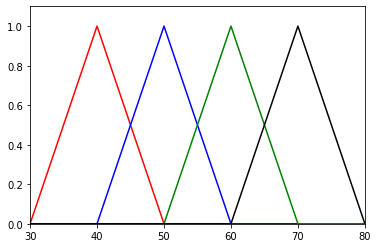

In [ ]:
arr = np.arange(30, 81, 1)
slow = fuzz.trimf(arr, [30, 40, 50])
medium = fuzz.trimf(arr, [40, 50, 60])
medium_fast = fuzz.trimf(arr, [50, 60, 70])
fall_speed = fuzz.trimf(arr, [60, 70, 80])
plt.figure()
plt.axes(xlim=(30, 80), ylim=(0, 1.1)) 
plt.plot(arr, slow, 'red', linewidth=1.5, label='Slow')
plt.plot(arr, medium, 'blue', linewidth=1.5, label='Medium')
plt.plot(arr, medium_fast, 'green', linewidth=1.5, label='Medium fast')
plt.plot(arr, fall_speed, 'black', linewidth=1.5, label='Fall speed')

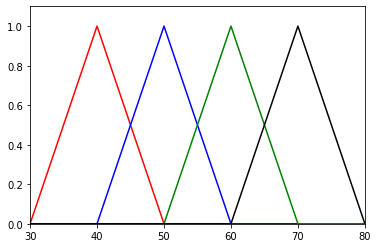

In [ ]:
arr = np.arange(30, 81, 1)
slow = fuzz.trapmf(arr, [30, 40, 40, 50])
medium = fuzz.trapmf(arr, [40, 50, 50, 60])
medium_fast = fuzz.trapmf(arr, [50, 60, 60, 70])
fall_speed = fuzz.trapmf(arr, [60, 70, 70, 80])
plt.figure()
plt.axes(xlim=(30, 80), ylim=(0, 1.1)) 
plt.plot(arr, slow, 'red', linewidth=1.5, label='Slow')
plt.plot(arr, medium, 'blue', linewidth=1.5, label='Medium')
plt.plot(arr, medium_fast, 'green', linewidth=1.5, label='Medium fast')
plt.plot(arr, fall_speed, 'black', linewidth=1.5, label='Fall speed')

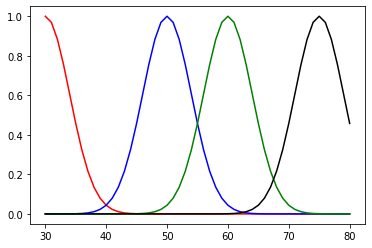

In [ ]:
arr = np.arange(30, 81, 1)
slow = fuzz.gaussmf(arr, 30, 4)
medium = fuzz.gaussmf(arr, 50, 4)
medium_fast = fuzz.gaussmf(arr, 60, 4)
fall_speed = fuzz.gaussmf(arr, 75, 4)
plt.figure()
# plt.axes(xlim=(30, 80), ylim=(0, 1.1)) 
plt.plot(arr, slow, 'red', linewidth=1.5, label='Slow')
plt.plot(arr, medium, 'blue', linewidth=1.5, label='Medium')
plt.plot(arr, medium_fast, 'green', linewidth=1.5, label='Medium fast')
plt.plot(arr, fall_speed, 'black', linewidth=1.5, label='Fall speed')

# New Section

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl

28.333333333333332


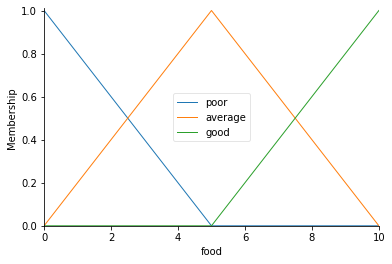

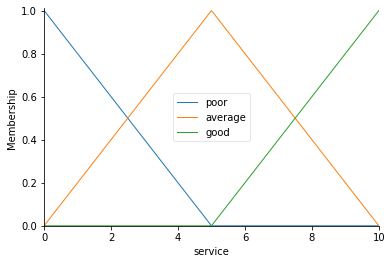

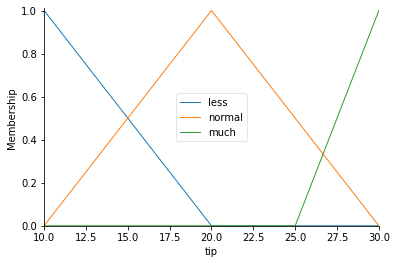

In [ ]:
food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(10, 31, 1), 'tip')

food['poor'] = fuzz.trimf(food.universe, [0, 0, 5])
food['average'] = fuzz.trimf(food.universe, [0, 5, 10])
food['good'] = fuzz.trimf(food.universe, [5, 10, 10])

service['poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['good'] = fuzz.trimf(service.universe, [5, 10, 10])

tip['less'] = fuzz.trimf(tip.universe, [10, 10, 20])
tip['normal'] = fuzz.trimf(tip.universe, [10, 20, 30])
tip['much'] = fuzz.trimf(tip.universe, [25, 30, 30])

food.view()
service.view()
tip.view()

rule1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule3 = ctrl.Rule(food['poor'] & service['good'], tip['normal'])
rule4 = ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule5 = ctrl.Rule(food['average'] & service['average'], tip['normal'])
rule6 = ctrl.Rule(food['average'] & service['good'], tip['normal'])
rule7 = ctrl.Rule(food['good'] & service['poor'], tip['less'])
rule8 = ctrl.Rule(food['good'] & service['average'], tip['much'])
rule9 = ctrl.Rule(food['good'] & service['good'], tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

tipping.input['food'] = 10
tipping.input['service'] = 10
tipping.compute()

print(tipping.output['tip'])

Power used to cook rice: 75.0 %


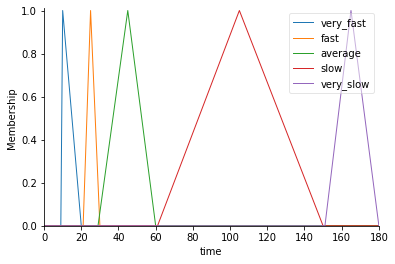

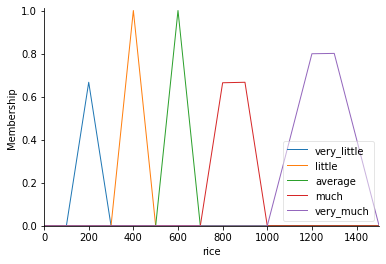

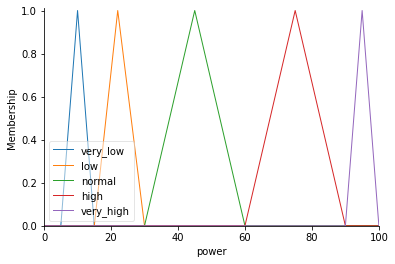

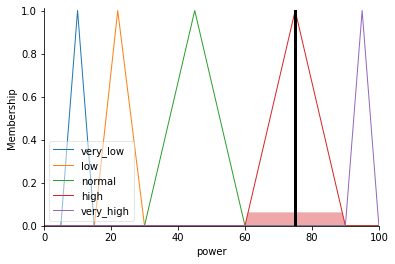

In [198]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl

time = ctrl.Antecedent(np.arange(0, 181, 1), 'time')
rice = ctrl.Antecedent(np.arange(0, 1600, 100), 'rice')
power = ctrl.Consequent(np.arange(0, 101, 1), 'power')

time['very_fast'] = fuzz.trimf(time.universe, [10, 10, 20])
time['fast'] = fuzz.trimf(time.universe, [21, 25, 30])
time['average'] = fuzz.trimf(time.universe, [29, 45, 60])
time['slow'] = fuzz.trimf(time.universe, [61, 105, 150])
time['very_slow'] = fuzz.trimf(time.universe, [151, 165, 180])

rice['very_little'] = fuzz.trimf(rice.universe, [100, 150, 300])
rice['little'] = fuzz.trimf(rice.universe, [301, 400, 500])
rice['average'] = fuzz.trimf(rice.universe, [501, 600, 700])
rice['much'] = fuzz.trimf(rice.universe, [701, 850, 1000])
rice['very_much'] = fuzz.trimf(rice.universe, [1001, 1250, 1501])

power['very_low'] = fuzz.trimf(power.universe, [5, 10, 15])
power['low'] = fuzz.trimf(power.universe, [15, 22, 30])
power['normal'] = fuzz.trimf(power.universe, [30, 45, 60])
power['high'] = fuzz.trimf(power.universe, [60, 75, 90])
power['very_high'] = fuzz.trimf(power.universe, [90, 95, 100])

# time.view()
# rice.view()
# power.view()

rule1 = ctrl.Rule(time['very_fast'] & rice['very_little'], power['very_low'])
rule2 = ctrl.Rule(time['very_fast'] & rice['little'], power['low'])
rule3 = ctrl.Rule(time['very_fast'] & rice['average'], power['normal'])
rule4 = ctrl.Rule(time['very_fast'] & rice['much'], power['high'])
rule5 = ctrl.Rule(time['very_fast'] & rice['very_much'], power['very_high'])

rule6 = ctrl.Rule(time['fast'] & rice['very_little'], power['very_low'])
rule7 = ctrl.Rule(time['fast'] & rice['little'], power['low'])
rule8 = ctrl.Rule(time['fast'] & rice['average'], power['normal'])
rule9 = ctrl.Rule(time['fast'] & rice['much'], power['high'])
rule10 = ctrl.Rule(time['fast'] & rice['very_much'], power['very_high'])

rule11 = ctrl.Rule(time['average'] & rice['very_little'], power['low'])
rule12 = ctrl.Rule(time['average'] & rice['little'], power['low'])
rule13 = ctrl.Rule(time['average'] & rice['average'], power['normal'])
rule14 = ctrl.Rule(time['average'] & rice['much'], power['high'])
rule15 = ctrl.Rule(time['average'] & rice['very_much'], power['very_high'])

rule16 = ctrl.Rule(time['slow'] & rice['very_little'], power['high'])
rule17 = ctrl.Rule(time['slow'] & rice['little'], power['high'])
rule18 = ctrl.Rule(time['slow'] & rice['average'], power['high'])
rule19 = ctrl.Rule(time['slow'] & rice['much'], power['high'])
rule20 = ctrl.Rule(time['slow'] & rice['very_much'], power['high'])

rule21 = ctrl.Rule(time['very_slow'] & rice['very_little'], power['very_high'])
rule22 = ctrl.Rule(time['very_slow'] & rice['little'], power['high'])
rule23 = ctrl.Rule(time['very_slow'] & rice['average'], power['very_high'])
rule24 = ctrl.Rule(time['very_slow'] & rice['much'], power['very_high'])
rule25 = ctrl.Rule(time['very_slow'] & rice['very_much'], power['very_high'])


power_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12,rule13, 
                                 rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
powering = ctrl.ControlSystemSimulation(power_ctrl)

powering.input['time'] = 30
powering.input['rice'] = 800
powering.compute()

print('Power used to cook rice: {} %'.format(powering.output['power']))

power.view(sim=powering)